In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sc

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import plot_node_kuramoto
from simplicial_kuramoto.plotting import plot_flow

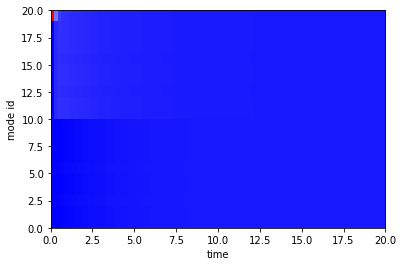

In [2]:
# test node Kuramoto
graph = modular_graph(2, 10, 2)
complex_test = SimplicialComplex(graph=graph)

# print("Incidence matrix:", complex_test.node_incidence_matrix)
complex_test.flip_edge_orientation(0)
# print("Orientation of 0 fliped:", complex_test.node_incidence_matrix)


initial_phase = np.zeros(len(graph))
initial_phase[0] = 1.0

results = integrate_node_kuramoto(complex_test, initial_phase, 20.0, 100)

plot_node_kuramoto(results)
plt.show()

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


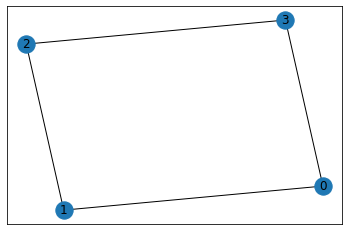

  (0, 0)	-1.0
  (0, 1)	1.0
  (1, 0)	-1.0
  (1, 3)	1.0
  (2, 1)	-1.0
  (2, 2)	1.0
  (3, 2)	-1.0
  (3, 3)	1.0

	heta_0:  [1.64023927 1.49053661 1.08354631 3.38261914]
	heta_final:  [2.72476336 3.55842195 2.72476336 2.72476336]
	heta_final:  [2.72476336 3.55842195 2.72476336 2.72476336]
Div:  [0. 0. 0. 0.]
Curl:  []
L1	heta:  [-6.28318531e+00 -1.25663706e+01  4.44089210e-16 -6.28318531e+00]
L1	heta:  [0. 0. 0. 0.]
dim(Ker(L1)):  1
Ker(L1):  [[-0.5]
 [ 0.5]
 [-0.5]
 [-0.5]]


In [3]:
# test edge Kuramoto
# cycle graph
Nn=4

G=nx.cycle_graph(Nn)
# G.add_edge(0,2)
plt.figure()
nx.draw_networkx(G)
plt.show()

test_complex=SimplicialComplex(graph=G)

B0=test_complex.node_incidence_matrix
B1=test_complex.edge_incidence_matrix

print(B0)
print(B1)

Nn=B0.shape[1]
Ne=B0.shape[0]
Nf=B1.shape[0]

initial_phase=2*np.pi*np.random.rand(Ne)
t_max = 1000
n_t = 200

# result=integrate_edge_kuramoto(test_complex, initial_phase, t_max, n_t, omega_0=None, a=1)
result=integrate_edge_kuramoto(test_complex, initial_phase, t_max, n_t, omega_0=None)

plot_flow(initial_phase,test_complex,result,plotname=None)
    
# B0[1,0]=-B0[1,0]
# B0[1,-1]=-B0[1,-1]

# plotflow(theta_0,B0,B1,'All same orientations')
# plotflow(theta_final,B0,B1,'All same orientations') 